# This notebook provides the commands needed to read in an NWB file with raw data taken from a trodes .rec file and to copy the relevant metadata into a DataJoint Schema designed to mimic NWB structure

### Code can be found at https://github.com/LorenFrankLab/nwb_datajoint/tree/develop_nwbraw

## The following steps must be completed before running this notebook:
### 1) Set up access to a DataJoint database. See https://tutorials.datajoint.io/
### 2) Install pynwb. 
    See https://pynwb.readthedocs.io/en/stable/getting_started.html#installation
### 3) Install the ndx-franklab-novela package. 
     conda install -c novelakrk ndx-franklab-novela
### 4) Download the example franklab raw data NWB file from DropBox. (Note that it is ~11GB)
    https://www.dropbox.com/s/gxdz6zbdp6ayxhu/beans20190718s1.nwb?dl=0

#### Make sure we're in the schema directory. 
#### Eventually this will be unnecessary because the package will properly installed

In [1]:
cd ../schema

/Users/loren/Src/NWB/nwb_datajoint/schema


#### Load all of the relevant modules

In [5]:
%load_ext autoreload
%autoreload 2


import pynwb
import os

#DataJoint and DataJoint schema
import datajoint as dj
import common_session
import common_ephys
import common_device
import common_lab
import common_task
import common_behav
import common_interval
import common_region
import common_filter

import nwb_dj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Please enter DataJoint username:  root
Please enter DataJoint password:  ········


Connecting root@localhost:3306


#### Specify the NWB file name and populate the rest of the schema

In [6]:
nwb_file_name = '/data/nwb_builder_test_data/beans20190718s1.nwb'

### Run the NWBPopulate function

In [7]:
nwb_dj.NWBPopulate([nwb_file_name]) 


Importing NWB file /data/nwb_builder_test_data/beans20190718s1.nwb
adding probe type: 128c-4s8mm6cm-20um-40um-sl
No Apparatus module found in /data/nwb_builder_test_data/beans20190718s1_pp.nwb



AttributeError: 'Series' object has no attribute 'probe_electrode'

#### Diagram the main schema and their relationships

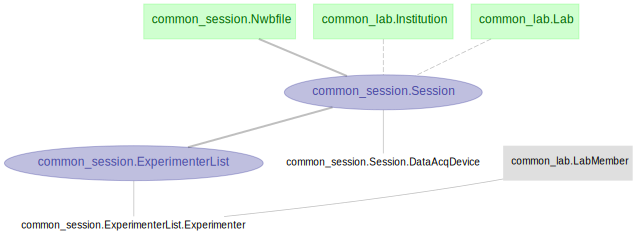

In [37]:
dj.Diagram(common_session)+dj.Diagram(common_lab)

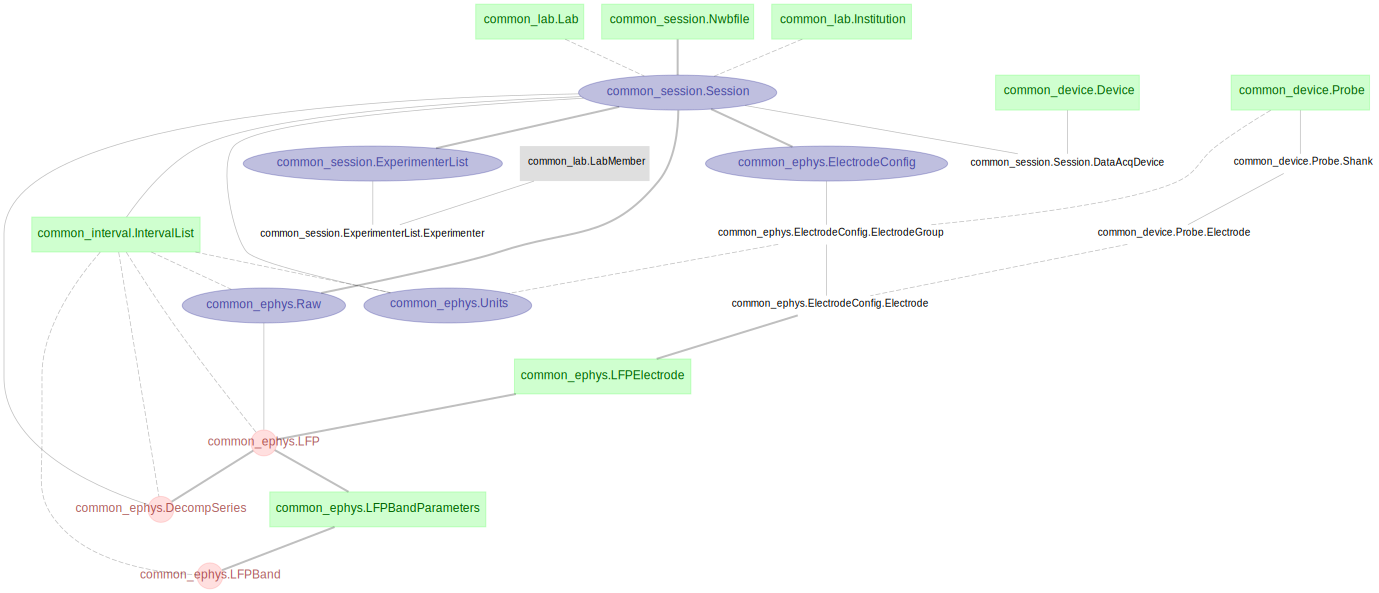

In [26]:
dj.Diagram(common_ephys)+dj.Diagram(common_session)+dj.Diagram(common_lab)+dj.Diagram(common_device)

In [39]:
common_ephys.ElectrodeConfig.Electrode()

/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


nwb_file_name,electrode_group_name electrode group name from NWBFile,electrode_id the unique number for this electrode,probe_type,probe_shank shank number within probe,probe_electrode electrode,region_id,name unique label for each contact,x the x coordinate of the electrode position in the brain,y the y coordinate of the electrode position in the brain,z the z coordinate of the electrode position in the brain,filtering description of the signal filtering,impedance electrode impedance,bad_channel if electrode is 'good' or 'bad' as observed during recording,x_warped x coordinate of electrode position warped to common template brain,y_warped y coordinate of electrode position warped to common template brain,z_warped z coordinate of electrode position warped to common template brain,contacts label of electrode contacts used for a bipolar signal -- current workaround
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,0,128c-4s8mm6cm-20um-40um-sl,0,0,1,0,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,1,128c-4s8mm6cm-20um-40um-sl,0,1,1,1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,2,128c-4s8mm6cm-20um-40um-sl,0,2,1,2,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,3,128c-4s8mm6cm-20um-40um-sl,0,3,1,3,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,4,128c-4s8mm6cm-20um-40um-sl,0,4,1,4,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,5,128c-4s8mm6cm-20um-40um-sl,0,5,1,5,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,6,128c-4s8mm6cm-20um-40um-sl,0,6,1,6,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,7,128c-4s8mm6cm-20um-40um-sl,0,7,1,7,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,9,128c-4s8mm6cm-20um-40um-sl,0,9,1,9,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,electrode group 0,11,128c-4s8mm6cm-20um-40um-sl,0,11,1,11,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,


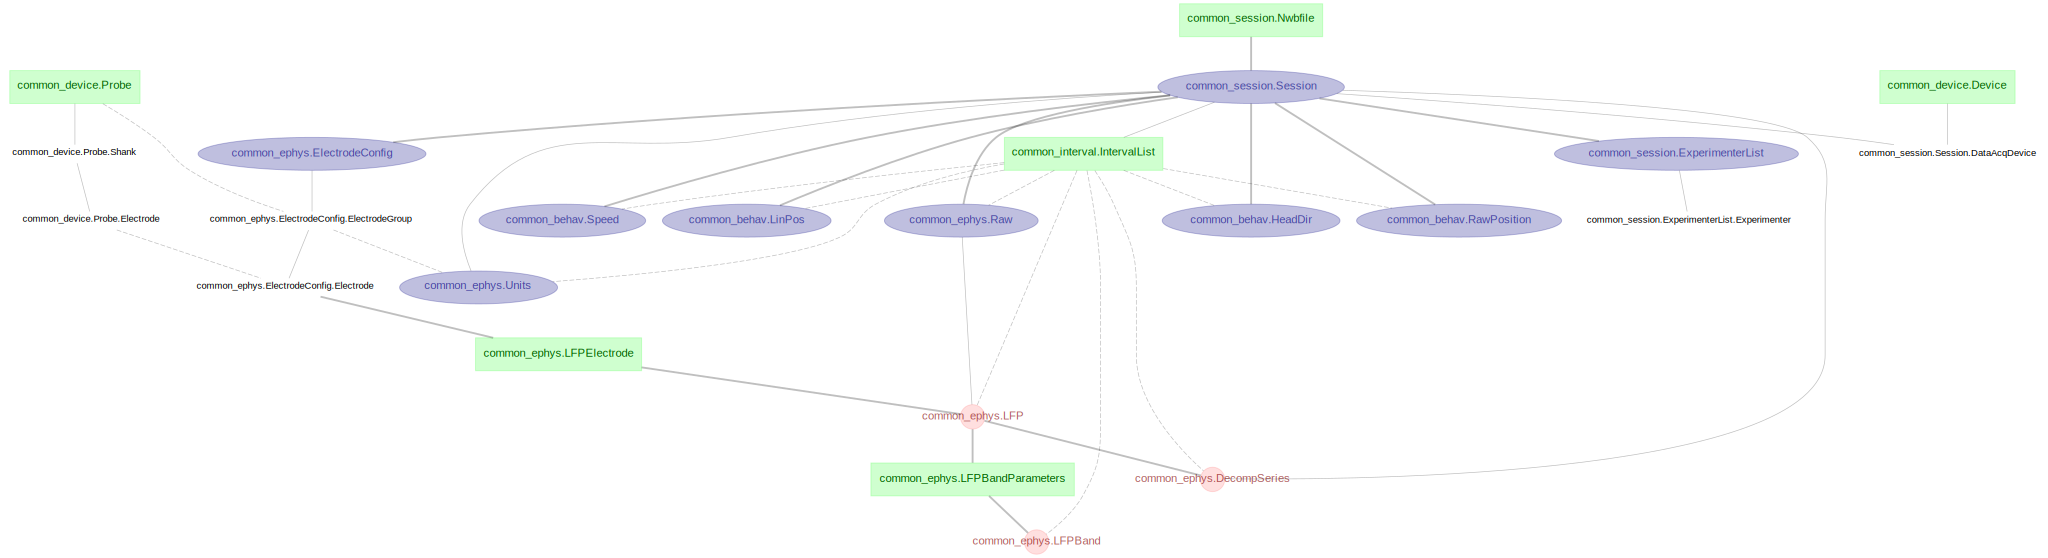

In [28]:
dj.Diagram(common_ephys)+dj.Diagram(common_session)+dj.Diagram(common_device)+dj.Diagram(common_behav)+dj.Diagram(common_interval)

In [20]:
common_session.Session()

nwb_file_name,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,Beans,"University of California, San Francisco",Loren Frank,tmp_id,Reinforcement leaarning,2019-07-18 15:29:47,2019-07-18 15:29:47,Reinforcement learning


In [41]:
common_ephys.Raw()

nwb_file_name,interval_name descriptive name of this interval list,nwb_object_id the NWB object ID for loading this object from the file,"sampling_rate Sampling rate calculated from data, in Hz",comments,description
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,raw data valid times,f0b31c07-6bd6-4013-8a43-ec1659c95b2d,20000.0,sample comment,Electrical series registered on electrode


In [11]:
common_interval.IntervalList()

nwb_file_name,interval_name descriptive name of this interval list,valid_times 2D numpy array with start and end times for each interval
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,pos valid times,=BLOB=
/data/nwb_builder_test_data/beans20190718s1_pp.nwb,raw data valid times,=BLOB=
